<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Preprocessing-Data" data-toc-modified-id="Preprocessing-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing Data</a></span></li><li><span><a href="#Fit-Model-to-Train-Set" data-toc-modified-id="Fit-Model-to-Train-Set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fit Model to Train Set</a></span></li><li><span><a href="#Make-Predictions-and-Evaluate-Performance" data-toc-modified-id="Make-Predictions-and-Evaluate-Performance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Make Predictions and Evaluate Performance</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Classification-Report" data-toc-modified-id="Classification-Report-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Classification Report</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>ROC Curve</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></div>

# Exploratory Data Analysis

In [17]:
# import libraries
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
import statsmodels

plt.style.use('ggplot')
%matplotlib inline

In [18]:
# load data
file = 'data/cancer.data'
df = pd.read_csv(file, header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [19]:
# summary statistics
df_description = df.describe()
print(df_description)

print('\n')

# DataFrame information
df_info = df.info()
print(df_info)


                 0           1           2           3           4   \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               5           7           8           9           10  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

# Data Cleaning

In [20]:
# Replace the '?'s with NaN
df = df.replace('?', np.nan)

In [21]:
# impute missing values with mean imputation
df.fillna(df.mean(), inplace=True)

# count the number of NANs to verify
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64

In [22]:
for col in df:
    if df[col].dtype == 'object':
        df = df.fillna(df[col].value_counts().index[0])
        
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


> It appears there are no missing values in the data set.

> Column names need to be renamed appropriatley.


In [23]:
# rename columns
df.rename(columns = {0:'sample_code_number', 1:'clump_thickness', 2:'uniformity_cell_size', 
                    3:'uniformity_cell_shape', 4:'marginal_adhesion', 5:'single_epithelial_cell_size', 
                    6:'bare_nuclei', 7:'bland_chromatin', 8:'normal_nucleoli', 9:'mitoses', 10:'class'}, inplace = True) 

In [24]:
# replace values in class with binary values
df['class'] = df['class'].replace([2,4], [1,0])

> Sample Code Number is not a neccesssary feature in predicting breast cancer, therefore it will need to be dropped.

In [25]:
# drop sample_code_number feature and convert dataframe to numpy array
df = df.drop(['sample_code_number'], axis=1)

# segregate features and lables into separate variables
X = df[['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']]
y = df[['class']]

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(489, 1) (489, 9)
(210, 1) (210, 9)


# Preprocessing Data

In [26]:
# instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# Fit Model to Train Set

In [27]:
logreg = LogisticRegression()

logreg.fit(rescaledX_train, y_train)

/home/molash/Documents/Projects/breast_cancer/cancer/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Make Predictions and Evaluate Performance

In [28]:
# predict instances for test and train
y_pred = logreg.predict(rescaledX_test)
y_pred_train = logreg.predict(rescaledX_train)


# accuracy score for logreg model
#rint('Accuracy of logistic regression classifier: ', logreg.score(rescaledX_test, y_test))

# confusion matrix of the model
print('Test set\n', confusion_matrix(y_test, y_pred))
print('\n')
print('Train set\n',confusion_matrix(y_train, y_pred_train))

Test set
 [[ 62   5]
 [  2 141]]


Train set
 [[164  10]
 [  8 307]]


### Classification Report


In [29]:
print('Logistic Regression classification report:')
print('Test set', classification_report(y_test, y_pred))            
print('\n')
print('Train set', classification_report(y_train, y_pred_train))

Logistic Regression classification report:
Test set               precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.97      0.99      0.98       143

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



Train set               precision    recall  f1-score   support

           0       0.95      0.94      0.95       174
           1       0.97      0.97      0.97       315

    accuracy                           0.96       489
   macro avg       0.96      0.96      0.96       489
weighted avg       0.96      0.96      0.96       489



### ROC Curve 

In [30]:
logreg_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold_log = roc_curve(y_test, y_pred)

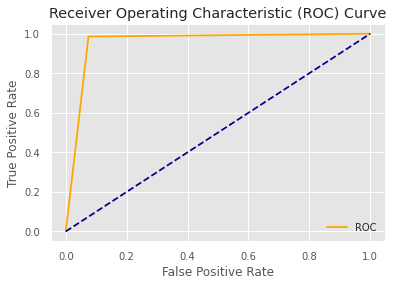

In [31]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature Importance

In [32]:
dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [38]:
dict = {'feature': X_train.columns, 'feature_importance':dt.feature_importances_}
new_df = pd.DataFrame(dict)
new_df.sort_values('feature_importance',axis=0,ascending=False,inplace=True)

In [35]:
new_df = new_df[new_df["feature_importance"] > 0.05]
new_df

,feature,feature_importance
2,uniformity_cell_shape,0.714860
5,bare_nuclei,0.133587
